<a href="https://colab.research.google.com/github/jovian-explorer/expeyes17/blob/main/Band%20Pass%20Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Band Pass Filter

####Importing libraries

In [ ]:
pip install lmfit

     |████████████████████████████████| 292 kB 4.0 MB/s 
     |████████████████████████████████| 40 kB 4.6 MB/s 
     |████████████████████████████████| 98 kB 6.9 MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.3-py3-none-any.whl size=84402 sha256=ce5bd014622a041ad05f282bf2f9e4c2be70dce661aad5b555b45cc39552a655
  Stored in directory: /root/.cache/pip/wheels/b9/7a/d1/236aa0f8196b264fda481a112f7cfb1bfde7bfb20235f8e331
  Created wheel for asteval: filename=asteval-0.9.26-py3-none-any.whl size=17648 sha256=c77919c9febfe486e3562189359fe4743c619c8c96737372bbc2735ffa007991
  Stored in directory: /root/.cache/pip/wheels/4c/e9/f0/bc343d5b77d2fded45177f424a6b0b9224b92ff6e7c150bad4
Successfully built lmfit asteval


In [ ]:
#importing libraries required
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.optimize import curve_fit
import scipy.optimize as so
from lmfit import minimize, Parameters, Parameter
import warnings
warnings.filterwarnings("ignore")

####Data

In [ ]:
url10 = 'https://raw.githubusercontent.com/jovian-explorer/expeyes17/main/Filters/Single-stage-filters/Band-pass-filter/test.csv'
dataset10 = pd.read_csv(url10, encoding='utf-8')
print(dataset10)

        freq      y
0     49.097  1.446
1    147.059  1.505
2    196.232  1.506
3    245.098  1.506
4    294.118  1.500
..       ...    ...
83  4651.163  0.621
84  4705.882  0.614
85  4750.594  0.609
86  4807.692  0.603
87  4901.961  0.589

[88 rows x 2 columns]


In [ ]:
# accessing the different columns of the csv dataset I made above
dataset10.columns = ["freq","y"]
#storing values for each column into a separate list
freq = np.array(dataset10.freq)
y = np.array(dataset10.y) 

In [ ]:
#Calculations
R10 = 682
C10 = 10**(-6)
L10 = 0.158
cutoff10 = 1/(2*np.pi * np.sqrt(L10* C10))

print("Resistance taken is " + str(R10) +" Ohm")
print("Capacitance taken is " + str(C10) + " Farad")
print("Capacitance taken is " + str(L10) + " Henry")
print("Cut-off frequency is " + str(cutoff10))

Resistance taken is 682 Ohm
Capacitance taken is 1e-06 Farad
Capacitance taken is 0.158 Henry
Cut-off frequency is 400.3977129654999


#### Frequency v/s gain

Fitted Values of R = 884.7718976727507 Ohm, L = 0.06806406052063796 H and C = 1.2860368935108113e-05 F


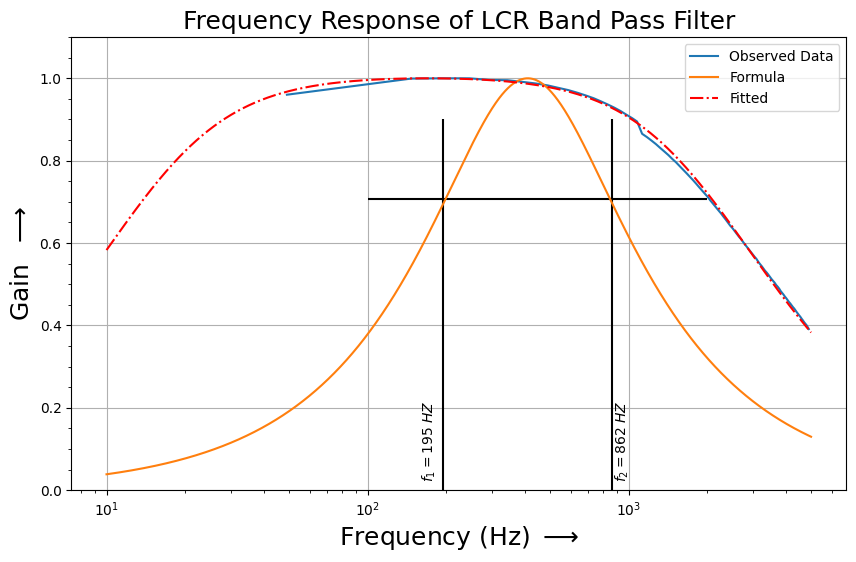

In [ ]:
ymax = np.max(y)
gain = y/ymax

L = 0.15 # Henry
R = 612  # Ohm
C = 0.000001 # Farad
f = np.arange(10, 5000, 0.1)
def Gain_fun(L, C, R, f):
      w = 2*np.pi*f
      H = abs((R/L)*complex(0, w)/(-w**2+(R/L)*complex(0, w)+(1/(L*C))))
      return H

def Phase_diff(L, C, R, f):
      w = 2*np.pi*f
      theta = np.angle((R/L)*complex(0, w)/(-w**2+(R/L)*complex(0, w)+(1/(L*C))))
      return theta

gain_output = []
phase_output = []
for i in range(len(f)):
      gain_output = np.append(gain_output, Gain_fun(L, C, R, f[i]))
      phase_output = np.append(phase_output, Phase_diff(L, C, R, f[i]))

def LCR_series(dparams, f, data):
      R = dparams['R'].value
      L = dparams['L'].value
      C = dparams['C'].value
      w = 2*np.pi*f
      #model = abs((R/L)*complex(0, w)/(-w**2+(R/L)*complex(0, w)+(1/(L*C))))
      model = R/(np.sqrt(R**2 + (w*L - 1/(w*C))**2))
      return data - model

params = Parameters()
params.add('R', value = 500, min = 0.0)
params.add('L', value = 0.15, min = 0.0)
params.add('C', value = 0.000001, min = 0.0)
mi = minimize(LCR_series , params, args=(freq, gain))
res = mi.residual
convgd = int(mi.errorbars)

v = [mi.params['R'].value,mi.params['L'].value,mi.params['C'].value]

# Fitted Values
a1 = v[0]
b1 = v[1]
c1 = v[2]

print(f"Fitted Values of R = {a1} Ohm, L = {b1} H and C = {c1} F")
w = 2*np.pi*f
model = a1/(np.sqrt(a1**2 + (w*b1 - 1/(w*c1))**2))


phase_fitted = []
for i in range(len(f)):
      
      phase_fitted = np.append(phase_output, Phase_diff(b1, c1, a1, f[i]))



plt.figure(figsize = [10, 6],dpi = 100)

plt.plot(freq, gain, label = 'Observed Data')
plt.plot(f, gain_output, label = 'Formula')
plt.plot(f, model, 'r-.',label = 'Fitted')
plt.legend()
plt.xscale('log')
plt.minorticks_on()
plt.grid()
plt.title("Frequency Response of LCR Band Pass Filter", fontsize = 18)
plt.ylabel(r"Gain  $\longrightarrow$", fontsize = 18)
plt.xlabel(r"Frequency (Hz) $\longrightarrow$", fontsize =18)
plt.vlines(195, -0.5 , 0.9, colors= 'black')
plt.vlines(862, -0.5 , 0.9, colors= 'black')
plt.text(160, 0.03, r'$f_1 = 195~HZ$', rotation = 90)
plt.text(880, 0.03, r'$f_2 = 862~HZ$', rotation =90)
plt.ylim(0.0, 1.1)
plt.hlines(max(gain)/np.sqrt(2), 100, 2000)
plt.show()

####Frequency v/s Phase Difference

In [ ]:
fre=[ 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1250, 1500, 2000, 2500, 3000, 3500, 4000]
phased= [ 0.527, 0.226, 0.075, -0.094 ,-0.1507, -0.268, -0.402, -0.452, -0.502, -0.628, -0.753, -0.879, -1.099, -1.13, -1.19, -1.25]
fr = np.array(fre)
phase = np.array(phased)

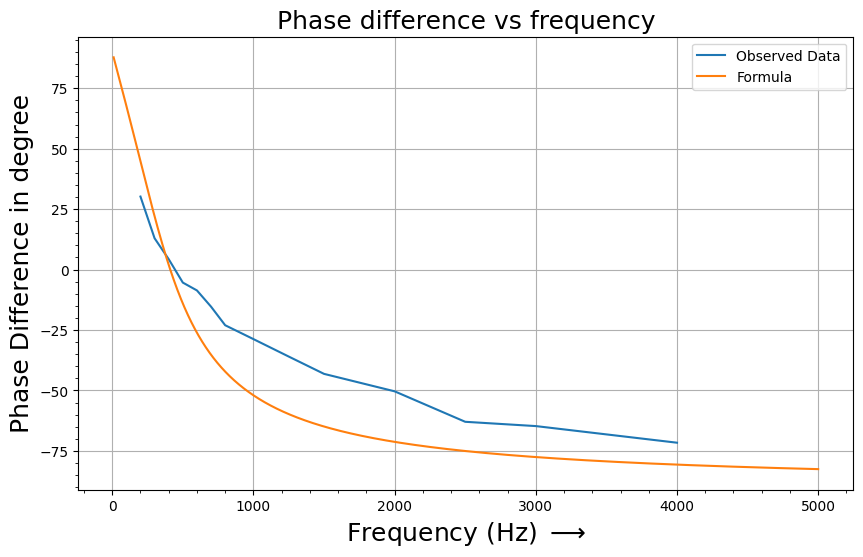

In [ ]:
plt.figure(figsize = [10, 6],dpi = 100)
plt.plot(fr, phase*180/np.pi, label = 'Observed Data')
plt.plot(f, phase_output*180/np.pi, label = 'Formula')
# plt.plot(f, phase_fitted[:-1]*180/np.pi)
plt.legend()

plt.minorticks_on()
plt.ylabel("Phase Difference in degree", fontsize = 18)
plt.grid()
plt.xlabel(r"Frequency (Hz) $\longrightarrow$", fontsize = 18)
plt.title("Phase difference vs frequency", fontsize = 18)
plt.show()